## Here is the code for analysis of components of hydrogen on different timesteps (reviewed and edited by Nikita)

In [1]:
import numpy as np
import plotly as ply
import plotly.graph_objs as go

In [2]:
def sortarg(it): #custom sortkey
    return int(it[0].split()[0])
def sortarg2(it): #custom sortkey
    return int(it.split()[0])

In [3]:
CELL_SIZE = 26.540779
R = 2

### Yegor's (and everybody's) function for grouping the nearby particles: 

In [4]:
def check_ball(x_center, y_center, z_center, x_other, y_other, z_other, r):
    if (x_center - x_other)**2 + (y_center - y_other)**2 + (z_center - z_other)**2 <= r**2:
        return True
    else:
        return False

In [5]:
def read(filename1,filename2, r):
    with open(filename1) as f1:
        lines1 = f1.readlines()
    with open(filename2) as f2:
        lines2 = f2.readlines()
    lines1.remove(lines1[0])
    lines2.remove(lines2[0])    
    lines1.sort(key=sortarg2) #sort by id
    lines2.sort(key=sortarg2)

    data=[]
    for i in range(len(lines1)): # chosing a particle to form a group
        if len(lines1[i]) > 15:
            k=lines1[i]
            k_split = k.split()
            k2=lines2[i]
            k2_split = k2.split()
            
            # checking whether the central particle in filename1 is on the edge
            if float(k_split[2]) >= CELL_SIZE-r:
                edge_x = -1 # indicating that we need to check around x=0 also
            elif float(k_split[2]) <= r:
                edge_x = 1 # indicating that we need to check arounf x=CELL_SIZE also
            elif float(k_split[2] )> r and float(k_split[2]) < CELL_SIZE-r:
                edge_x = 0 # we do not need to check x on the other side
            
            if float(k_split[3]) >= CELL_SIZE-r:
                edge_y = -1 
            elif float(k_split[3]) <= r:
                edge_y = 1 
            elif float(k_split[3]) > r and float(k_split[3]) < CELL_SIZE-r:
                edge_y = 0 
            
            if float(k_split[4]) >= CELL_SIZE-r:
                edge_z = -1 
            elif float(k_split[4]) <= r:
                edge_z = 1 
            elif float(k_split[4]) > r and float(k_split[4]) < CELL_SIZE-r:
                edge_z = 0
            
            # checking the same for filename2
            if float(k2_split[2]) >= CELL_SIZE-r:
                edge_x2 = -1 
            elif float(k2_split[2]) <= r:
                edge_x2 = 1 
            elif float(k2_split[2] )> r and float(k2_split[2]) < CELL_SIZE-r:
                edge_x2 = 0 
            
            if float(k2_split[3]) >= CELL_SIZE-r:
                edge_y2 = -1 
            elif float(k2_split[3]) <= r:
                edge_y2 = 1 
            elif float(k2_split[3]) > r and float(k2_split[3]) < CELL_SIZE-r:
                edge_y2 = 0 
            
            if float(k2_split[4]) >= CELL_SIZE-r:
                edge_z2 = -1 
            elif float(k2_split[4]) <= r:
                edge_z2 = 1 
            elif float(k2_split[4]) > r and float(k2_split[4]) < CELL_SIZE-r:
                edge_z2 = 0
        
            d=[] # array for the group of each atom
            d.append(k)
            for j in range(len(lines1)): # going through potential groupmates
                m=lines1[j] # particle
                m_split = m.split()         
                
                if i != j and len(m) > 15 and check_ball(float(k_split[2]), float(k_split[3]), float(k_split[4]), \
                    float(m_split[2]), float(m_split[3]), float(m_split[4]), r):
                    m2=lines2[j]
                    m2_split = m2.split()
                    if len(m2) > 15 and check_ball(float(k2_split[2]), float(k2_split[3]), float(k2_split[4]), \
                                                   float(m2_split[2]), float(m2_split[3]), float(m2_split[4]), r):
                        d.append(m)
                    # checking edges in filename2
                    if edge_x2 != 0 or edge_y2 != 0 or edge_z2 != 0:
                        if len(m2) > 15 and check_ball(edge_x2*CELL_SIZE + float(k2_split[2]), edge_y2*CELL_SIZE + float(k2_split[3]), edge_z2*CELL_SIZE + float(k2_split[4]), \
                                                   float(m2_split[2]), float(m2_split[3]), float(m2_split[4]), r):
                            d.append(m)
                
                # checking edges in filename1
                if edge_x != 0 or edge_y != 0 or edge_z != 0:
                    if i != j and len(m) > 15 and check_ball(edge_x*CELL_SIZE + float(k_split[2]),edge_y*CELL_SIZE + float(k_split[3]),edge_z*CELL_SIZE + float(k_split[4]), \
                                                       float(m_split[2]), float(m_split[3]), float(m_split[4]), r):
                        m2=lines2[j]
                        m2_split = m2.split()
                        if len(m2) > 15 and check_ball(float(k2_split[2]), float(k2_split[3]), float(k2_split[4]), \
                                                       float(m2_split[2]), float(m2_split[3]), float(m2_split[4]), r):
                            d.append(m)
                        if edge_x2 != 0 or edge_y2 != 0 or edge_z2 != 0:
                            if len(m2) > 15 and check_ball(edge_x2*CELL_SIZE + float(k2_split[2]), edge_y2*CELL_SIZE + float(k2_split[3]), edge_z2*CELL_SIZE + float(k2_split[4]), \
                                                       float(m2_split[2]), float(m2_split[3]), float(m2_split[4]), r):
                                d.append(m)
            data.append(d)
    data.sort(key=sortarg)
    return data

### Alexander's function for analysis of bonded particles:

In [6]:
def calculate(mydata):
    quantity_E=0 #количество электронов
    quantity_Hp=0 #количество ионов водорода
    quantity_H1=0 #количество H1
    quantity_H2=0 #количество H2
    quantity_N=0 #количество неопределенных атомов
    for i in range (len(mydata)):
        N=0
        for j in range (len(mydata[i])):
            N+=int(mydata[i][j].split()[1])
        if N==6 and len(mydata[i])==4:
            quantity_H2+=1
        elif N==3 and len(mydata[i])==2:
            quantity_H1+=1
        elif N==1:
            quantity_Hp+=1
        elif N==2 and len(mydata[i])==1:
            quantity_E+=1
        
    quantity_N=2000-quantity_Hp-quantity_E-quantity_H1-quantity_H2          
    
    return quantity_H2, quantity_Hp, quantity_E, quantity_H1, quantity_N

### Vika's function for plot making:

In [7]:
def make_concentrations_arrays(N=5850000, step=100000):
    i = 1000
    h2 = []
    hp = []
    em = []
    h = []
    dfc = []
    
    folder_num = 0
    read_data2 = []
    step1 = 10000
    while i <= N:
        if (i >= folder_num + 1000000):
            folder_num += 1000000
        data1 = "timesteps_tables_" + str(folder_num) + "/" + str(i) + ".txt"
        
        if (i+step1 >= folder_num + 1000000):
            folder_num += 1000000
        if (i+step1 > N):
            return h2, hp, em, h, dfc
        
        
        data2 = "timesteps_tables_" + str(folder_num) + "/" + str(i+step1) + ".txt"
        
        read_data = read(data1, data2, 2)
        comps = calculate(read_data)
        h2.append(comps[0])
        hp.append(comps[1])
        em.append(comps[2])
        h.append(comps[3])
        dfc.append(comps[4])
        print("done:", i)
        
        i += step
    
    return h2, hp, em, h, dfc

In [8]:
h2, hp, em, h, dfc = make_concentrations_arrays()
print("done with everything")

done: 1000
done: 101000
done: 201000
done: 301000
done: 401000
done: 501000
done: 601000
done: 701000
done: 801000
done: 901000
done: 1001000
done: 1101000
done: 1201000
done: 1301000
done: 1401000
done: 1501000
done: 1601000
done: 1701000
done: 1801000
done: 1901000
done: 2001000
done: 2101000
done: 2201000
done: 2301000
done: 2401000
done: 2501000
done: 2601000
done: 2701000
done: 2801000
done: 2901000
done: 3001000
done: 3101000
done: 3201000
done: 3301000
done: 3401000
done: 3501000
done: 3601000
done: 3701000
done: 3801000
done: 3901000
done: 4001000
done: 4101000
done: 4201000
done: 4301000
done: 4401000
done: 4501000
done: 4601000
done: 4701000
done: 4801000
done: 4901000
done: 5001000
done: 5101000
done: 5201000
done: 5301000
done: 5401000
done: 5501000
done: 5601000
done: 5701000
done: 5801000
done with everything


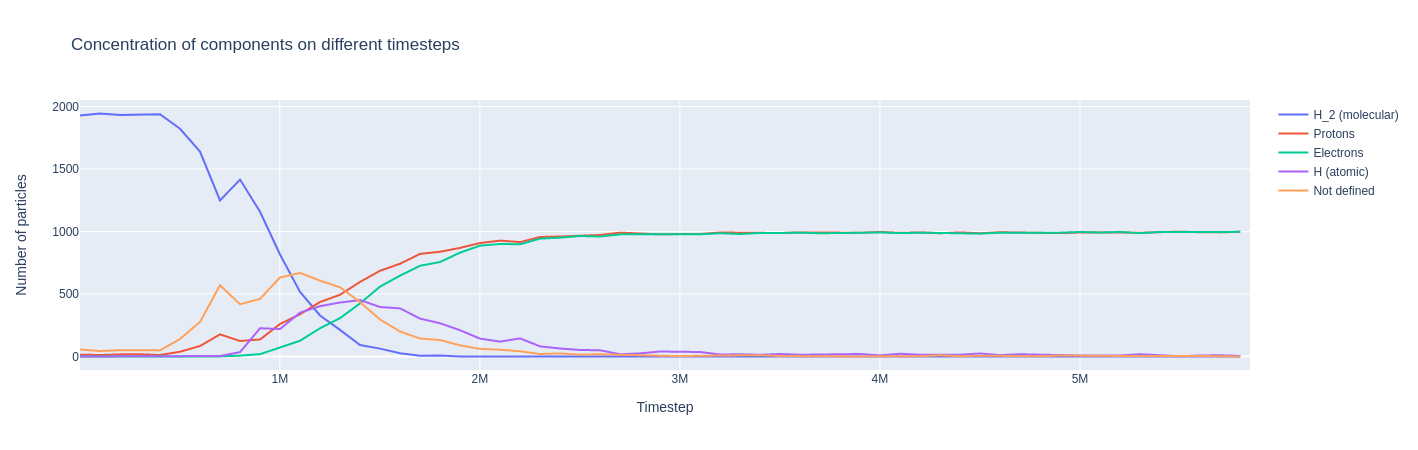

In [11]:
N = 5850000
step = 100000
timesteps = np.arange(1000, 5850000, step)

fig = go.Figure()

fig.update_layout(title="Concentration of components on different timesteps")
fig.update_yaxes(title="Number of particles")
fig.update_xaxes(range=[1000, N], title="Timestep")
fig.add_trace(go.Scatter(x=timesteps, y=h2, name="H_2 (molecular)"))
fig.add_trace(go.Scatter(x=timesteps, y=hp, name="Protons"))
fig.add_trace(go.Scatter(x=timesteps, y=em, name="Electrons"))
fig.add_trace(go.Scatter(x=timesteps, y=h, name="H (atomic)"))
fig.add_trace(go.Scatter(x=timesteps, y=dfc, name="Not defined"))

fig.show()